In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
events=pd.read_csv('athlete_events.csv')
regions=pd.read_csv('datasets_31029_40943_noc_regions.csv')
host=pd.read_csv('datasets_42673_74933_olym.csv',encoding='latin-1')

In [3]:
events.shape

(271116, 15)

In [4]:
regions.shape

(230, 3)

In [5]:
host.shape

(51, 9)

In [6]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
host.head()

,City,Country,Summer (Olympiad),Winter,Year,latitude,longitude,Unnamed: 7,Unnamed: 8
0,Athens,Greece,I,NaN,1896.0,37.983333,23.733334,NaN,NaN
1,Paris,France,II,NaN,1900.0,48.853410,2.348800,NaN,NaN
2,St. Louis,United States,III,NaN,1904.0,38.627273,-90.197891,NaN,NaN
3,London,United Kingdom,IV,NaN,1908.0,51.508415,-0.125533,NaN,NaN
4,Stockholm,Sweden,V,NaN,1912.0,59.332577,18.064903,NaN,NaN


In [9]:
events=pd.merge(events,regions,left_on='NOC',right_on='NOC',
               how='left')


In [10]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


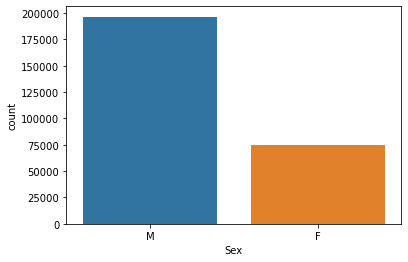

In [11]:
sns.countplot(events['Sex'])

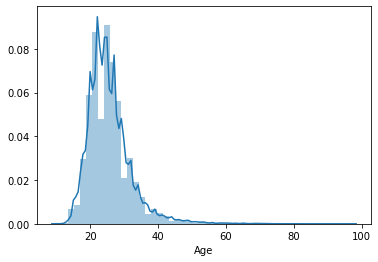

In [12]:
sns.distplot(events['Age'])

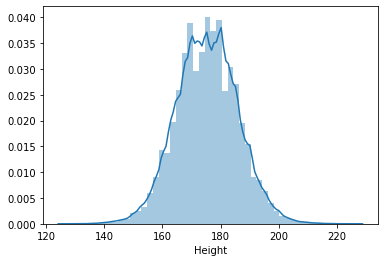

In [13]:
sns.distplot(events['Height'])

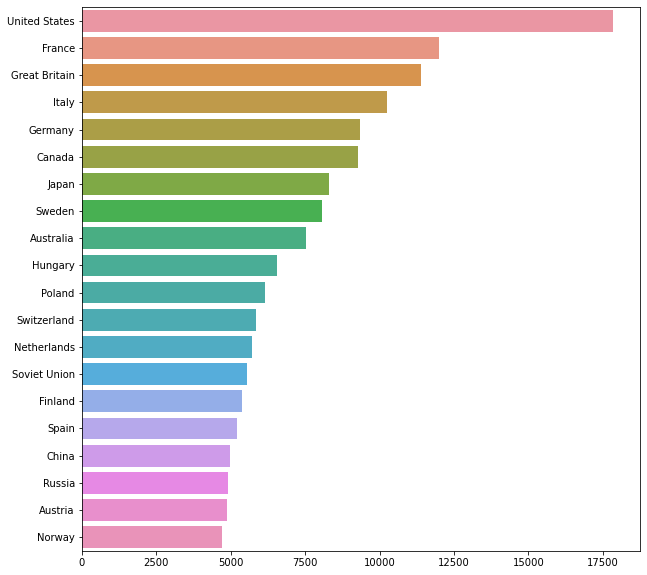

In [14]:
pl.figure(figsize=(10,10))
sns.barplot(events['Team'].value_counts()[:20].values,
           events['Team'].value_counts()[:20].keys())
pl.show()

In [15]:
events['Sex']=events['Sex'].map({'M':'Male','F':'Female'})
events['region']=events['region'].str.replace('Boliva','Bolivia')

In [16]:
def sports_category(events):
    skating   = ['Speed Skating','Figure Skating','Short Track Speed Skating']
    skiing    = [ 'Cross Country Skiing', 'Alpine Skiing','Nordic Combined',
                 'Freestyle Skiing', 'Ski Jumping','Snowboarding', 'Alpinism']
    Bobsleigh = ['Bobsleigh','Skeleton']
    aquatics  =  ['Swimming','Synchronized Swimming','Diving','Water Polo']
    volley    =  ['Volleyball','Beach Volleyball']
    gymnastic =  ['Gymnastics','Rhythmic Gymnastics', 'Trampolining']
    totals=skating+skiing+Bobsleigh+aquatics+volley+gymnastic
    for i in skating:
        if events['Sport']==i:
            return 'Skating'
    
    for i in skiing :
        if events["Sport"] == i :
            return "Skiing"
    
    for i in Bobsleigh :
        if events["Sport"] == i :
            return "Bobsleigh"
    
    for i in aquatics :
        if events["Sport"] == i :
            return "Aquatics"
    
    for i in volley :
        if events["Sport"] == i :
            return "Volley"
        
    for i in gymnastic :
        if events["Sport"] == i :
            return "Gymnastic"
    
    if events['Sport'] not in totals: 
        return events["Sport"]

events['Sport_category']=events.apply(lambda events: sports_category(events),axis=1)

In [17]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Sport_category
0,1,A Dijiang,Male,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,Basketball
1,2,A Lamusi,Male,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,Judo
2,3,Gunnar Nielsen Aaby,Male,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,Football
3,4,Edgar Lindenau Aabye,Male,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,Tug-Of-War
4,5,Christine Jacoba Aaftink,Female,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,Skating


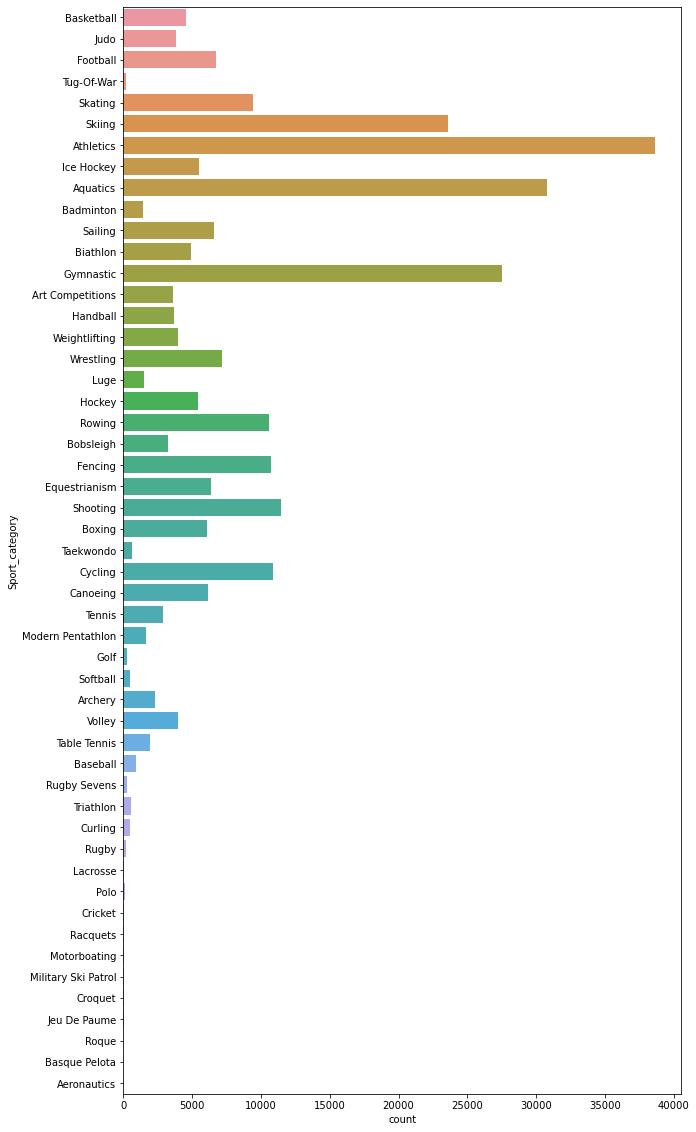

In [18]:
pl.figure(figsize=(10,20))
sns.countplot(y=events['Sport_category'])

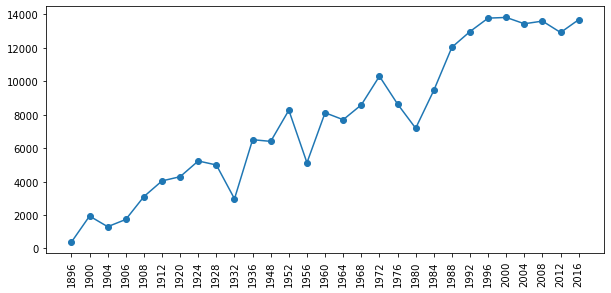

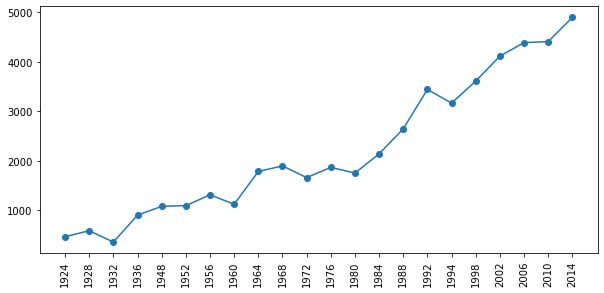

In [19]:
pl.figure(figsize=(10,10))
sum_win=events.groupby(['Season','Year'])['Year'].count()
pl.subplot(2,1,1)
pl.plot(sum_win['Summer'].values,marker='o')
pl.xticks(range(len(sum_win['Summer'])),sum_win['Summer'].keys(),rotation=90)
pl.show()
pl.figure(figsize=(10,10))

pl.subplot(2,1,2)
pl.plot(sum_win['Winter'].values,marker='o')
pl.xticks(range(len(sum_win['Winter'])),sum_win['Winter'].keys(),rotation=90)
pl.show()

In [20]:
def gold_m(events):
    if events['Medal']=='Gold':
        return 1
    else:
        return 0
def silver_m(events):
    if events['Medal']=='Silver':
        return 1
    else:
        return 0
def bronze_m(events):
    if events['Medal']=='Bronze':
        return 1
    else:
        return 0
events['Gold']=events.apply(lambda events: gold_m(events),axis=1)
events['Silver']=events.apply(lambda events: silver_m(events),axis=1)
events['Bronze']=events.apply(lambda events: bronze_m(events),axis=1)
events['Total']=events['Gold']+events['Silver']+events['Bronze']
summer=events[events['Season']=='Summer']
winter=events[events['Season']=='Winter']

In [23]:
host.head()

,City,Country,Summer (Olympiad),Winter,Year,latitude,longitude,Unnamed: 7,Unnamed: 8
0,Athens,Greece,I,NaN,1896,37.983333,23.733334,NaN,NaN
1,Paris,France,II,NaN,1900,48.853410,2.348800,NaN,NaN
2,St. Louis,United States,III,NaN,1904,38.627273,-90.197891,NaN,NaN
3,London,United Kingdom,IV,NaN,1908,51.508415,-0.125533,NaN,NaN
4,Stockholm,Sweden,V,NaN,1912,59.332577,18.064903,NaN,NaN


In [22]:
host['Year']=host['Year'].fillna(method='ffill')
host['Year']=host['Year'].astype('int')

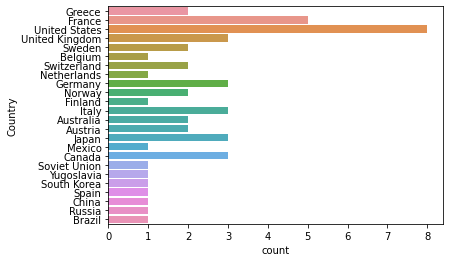

In [28]:
sns.countplot(y=host['Country'])

In [30]:
host['Country']=host['Country'].str.replace("\xa0","")
host['Country']=host['Country'].str.replace("Nazi Germany","Germany")
host['Country']=host['Country'].str.replace("West Germany","Germany")
host["Summer (Olympiad)"]=host["Summer (Olympiad)"].fillna("winter")
host["Winter"]=host["Winter"].fillna("Summer")

In [37]:
def lab(host):
    if host['Summer (Olympiad)']=='winter':
        return 'Winter'
    if host['Winter']=='Summer':
        return 'Summer'
    
host['Season']=host.apply(lambda host: lab(host),axis=1)

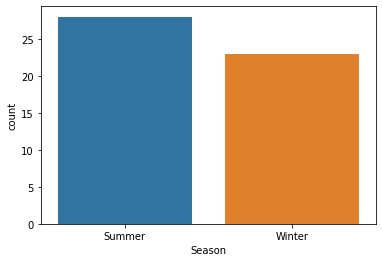

In [38]:
sns.countplot(host['Season'])

In [42]:
host=host[['City','Country','Year','latitude','longitude','Season']]
host_s=host[host['Season']=='Summer']
host_w=host[host['Season']=='Winter']

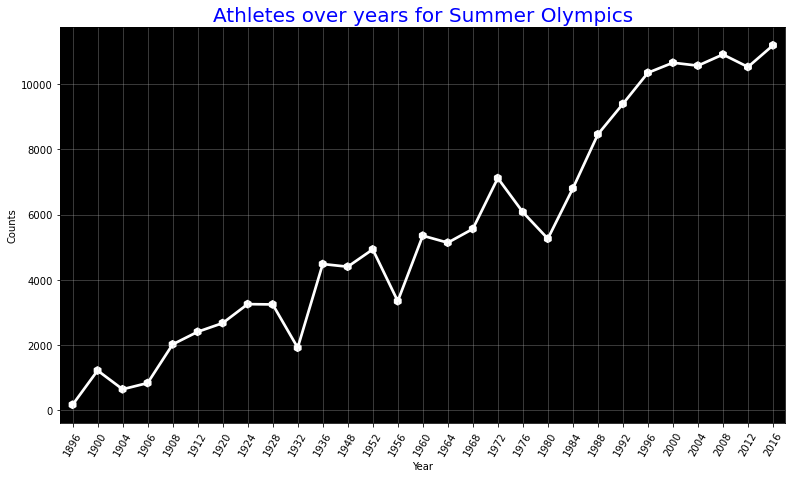

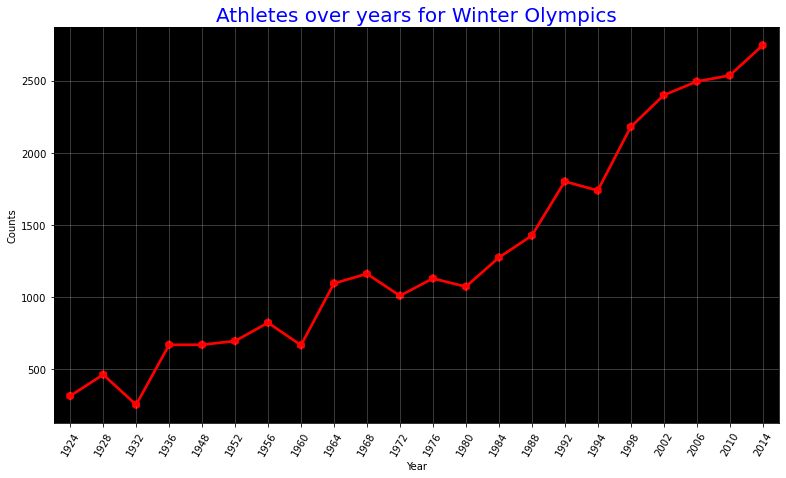

In [67]:
sum_c=summer.groupby(['Year'])['ID'].nunique().reset_index()
win_c=winter.groupby(['Year'])['ID'].nunique().reset_index()

fig=pl.figure(figsize=(13,16))
pl.subplot(211)
ax=sns.pointplot(x=sum_c['Year'],y=sum_c['ID'],color='white',
                markers='h')
ax.set_facecolor('k')
pl.xticks(rotation=60)
pl.ylabel('Counts')
pl.title('Athletes over years for Summer Olympics',color='b',
        fontsize=20)
pl.grid(alpha=.4)
pl.show()
fig=pl.figure(figsize=(13,16))

pl.subplot(212)
ax=sns.pointplot(x=win_c['Year'],y=win_c['ID'],color='r',
                markers='h')
ax.set_facecolor('k')
pl.xticks(rotation=60)
pl.ylabel('Counts')
pl.title('Athletes over years for Winter Olympics',color='b',
        fontsize=20)
pl.grid(alpha=.4)
pl.show()
